<a href="https://colab.research.google.com/github/KsenyaSeva/Stroke-prediction/blob/main/Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Прогнозирование и оценкa вероятности заболевания инсультом*





# *Описание проблемы*
Инсульт — острое нарушение кровоснабжения головного мозга (острое нарушение мозгового кровообращения), характеризующееся внезапным (в течение нескольких минут, часов) появлением очаговой и/или общемозговой неврологической симптоматики, которая сохраняется более 24 часов или приводит к смерти больного в более короткий промежуток времени вследствие цереброваскулярной патологии.

По данным Всемирной организации здравоохранения (ВОЗ), инсульт занимает второе место среди причин смерти в мире, на него приходится около 11% всех смертей.
За период с 1990 по 2010 количество инсультов в развитых странах уменьшилось примерно на 10 %, а в развивающихся странах — увеличилось на 10 %. Повышенный риск смерти от инсульта наблюдается у жителей южной Азии, на них приходится около 40 % смертей от инсульта.

Заболеваемость инсультом значительно увеличивается с возрастом начиная с 30 лет. Преклонный возраст является наиболее значительным фактором риска инсульта. 95 % инсультов происходит в возрасте 45 лет и более, 2/3 в возрасте более 65 лет.

Инсульт в настоящее время является одной из основных причин инвалидности населения. Инвалидами становятся 70—80 % выживших после инсульта, причём примерно 20—30 % из них нуждаются в постоянном постороннем уходе.

Летальность у больных с инсультами во многом зависит от условий лечения в остром периоде. Ранняя 30-дневная летальность после инсульта составляет 35 %. В стационарах летальность составляет 24 %, а у лечившихся дома — 43 %. В течение года умирает около 50 % больных. 

Поэтому разработка программного обеспечения для прогнозирования и оценки вероятности заболевания инсультом -  это необходимая и очень важная задача для медицинской сферы.

# *Описание данных*
Данный датасет содержит 5110 записей для прогнозирования вероятности инсульта у пациентов. 

Столбцы:
- id: уникальный идентификатор
- gender: пол 'мужской', 'женский' или 'другой'
- age: возраст пациента
- hypertension(гипертония): 0, если у пациента нет гипертонии, 1, если у пациента гипертония
- heart_disease(болезнь сердца): 0, если у пациента нет заболеваний сердца, 1, если у пациента есть заболевание сердца
- ever_married(женат/замужем или нет):'нет' или 'да'
- work_type(тип работы): 'дети/студенты', 'государственный', 'никогда не работавший', 'частный' или 'самозанятый'
- Residence_type(тип местности): 'Сельская' или 'Городская'
- avg_glucose_level(средний показатель глюкозы): средний уровень глюкозы в крови
- BMI: индекс массы тела
- smoke_status(статус курения): 'ранее курил', 'никогда не курил', 'курит' или 'неизвестно'*
- stroke(инсульт): 1, если у пациента был инсульт или 0, если нет

*Примечание: «неизвестно» в smoke_status означает, что информация пациента недоступна.


#*Импорт* *библиотек*

In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import sklearn 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


#*Предобработка данных*


In [ ]:
# Путь к файлу
drive.mount('/content/drive')
files = '/content/drive/MyDrive/healthcare-dataset-stroke-data.csv'

# Загрузка данных
df = pd.read_csv(files)
# Заполняем в столбце 'bmi' пустые строки - 0
#df['bmi'].fillna(0, inplace=True)
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
df.shape

(5110, 12)

Данные исправила убрала пустые строки, теперь данные представлены в числовом формате




#*Визуализация данных*

In [ ]:
#средний показатель ИМТ, при котором возник инсульт
mean_bmi_has_stroke = df[df['stroke']== 1]['bmi'].mean()
mean_bmi_has_stroke

30.471291866028707

In [ ]:
#средний показатель ИМТ, при котором не было инсульта
mean_bmi_no_stroke = df[df['stroke']== 0]['bmi'].mean()
mean_bmi_no_stroke

28.823063829787234

In [ ]:
#Заменяем пустые строки в столбце bmi средними значениями 
df.loc[df['stroke']== 1,'bmi']= df.loc[df['stroke']== 1,'bmi'].fillna(mean_bmi_has_stroke)
df.loc[df['stroke']== 0,'bmi']= df.loc[df['stroke']== 0,'bmi'].fillna(mean_bmi_no_stroke)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.471292,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df_all = df.copy()

df_stroke = df[df['stroke']==1]

df_no = df[df['stroke']==0]

In [ ]:

def plot_pie(column, title="Данные о пациентах"):
  fig,axs = plt.subplots(1,1)
  data = df_all[column].value_counts()
  plt.pie(data,autopct='%1.2f%%',labels=data.index)
  plt.title(title)
  #plt.legend(labels = ['не было инсульта', 'был инсульт'])
  plt.show()


def plot_pie_compare(column):
  data_churned = df_stroke[column].value_counts()
  data_nonchurned = df_no[column].value_counts()
    
  fig,axs = plt.subplots(2,1)
  plt.subplots_adjust(left=0, bottom=0, right=1, top=2, wspace=0, hspace=0.2)
  axs[0].pie(data_nonchurned,autopct='%1.2f%%',labels=data_nonchurned.index)
  axs[0].title.set_text('Не было инсульта')
  axs[1].pie(data_churned,autopct='%1.2f%%',labels=data_churned.index)
  axs[1].title.set_text('Был инсульт')
  plt.show()


def plot_hist(column, title="Данные о пациентах"):
  plt.hist(df_all[column],density=True)
  plt.title(title)
  plt.show()


def plot_hist_compare(column, bins=5):
    plt.hist([df_no[column], df_stroke[column]] , color=["c", "r"])
    plt.legend(('Не было инсульта', 'Был инсульт'))
    plt.show()


def check_median(column):
    data_churned = df_stroke[column].describe()
    data_nonchurned = df_no[column].describe()
    print('Нет инсульта: {}'.format(data_nonchurned['50%']))
    print('Был инсульт: {}'.format(data_churned['50%']))


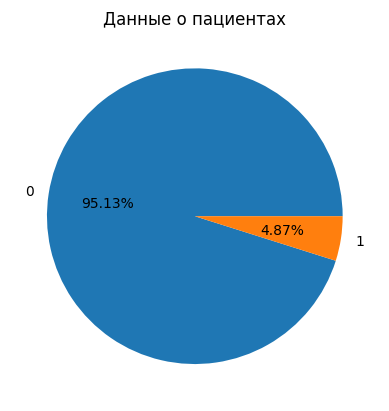

In [ ]:
plot_pie('stroke')

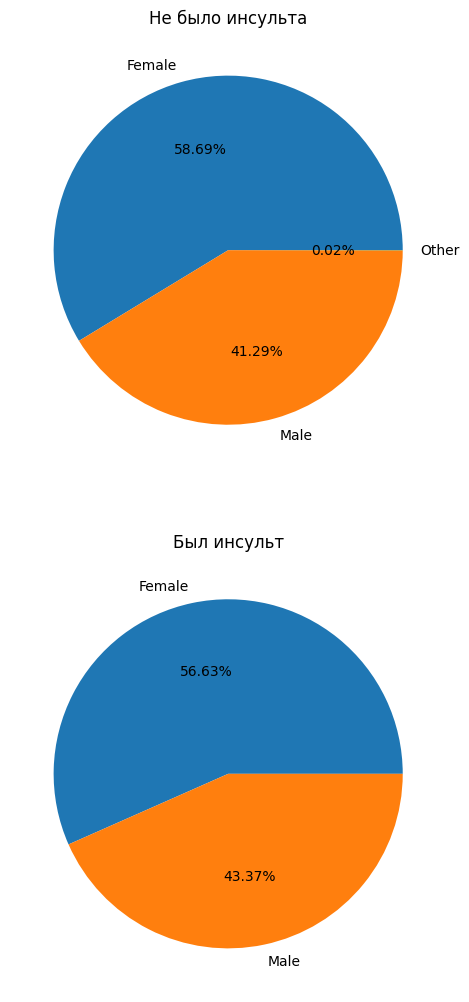

In [ ]:
plot_pie_compare('gender') 

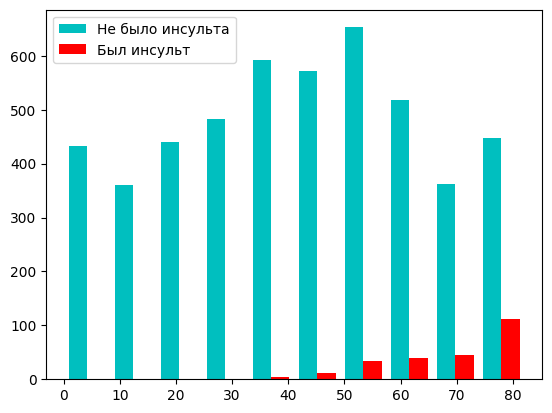

Нет инсульта: 43.0
Был инсульт: 71.0


In [ ]:
plot_hist_compare('age')
check_median('age') 

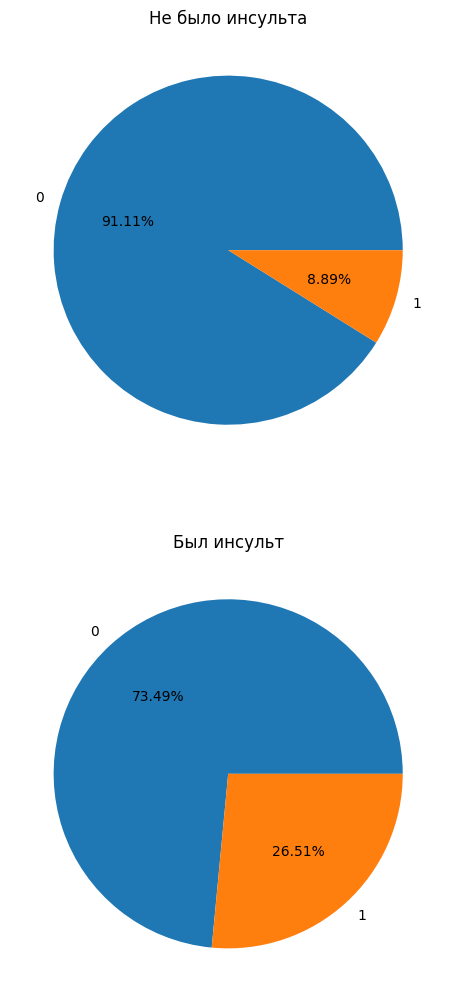

In [ ]:
plot_pie_compare('hypertension')

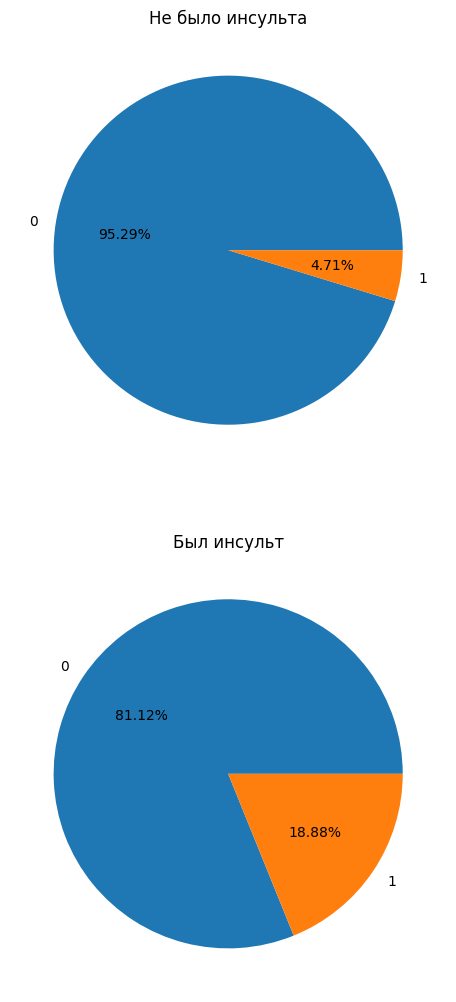

In [ ]:
plot_pie_compare('heart_disease') 

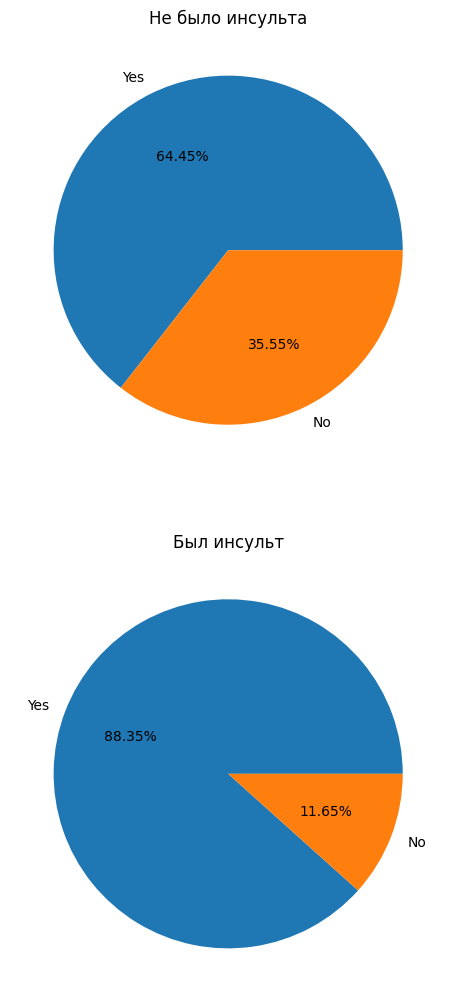

In [ ]:
plot_pie_compare('ever_married') 

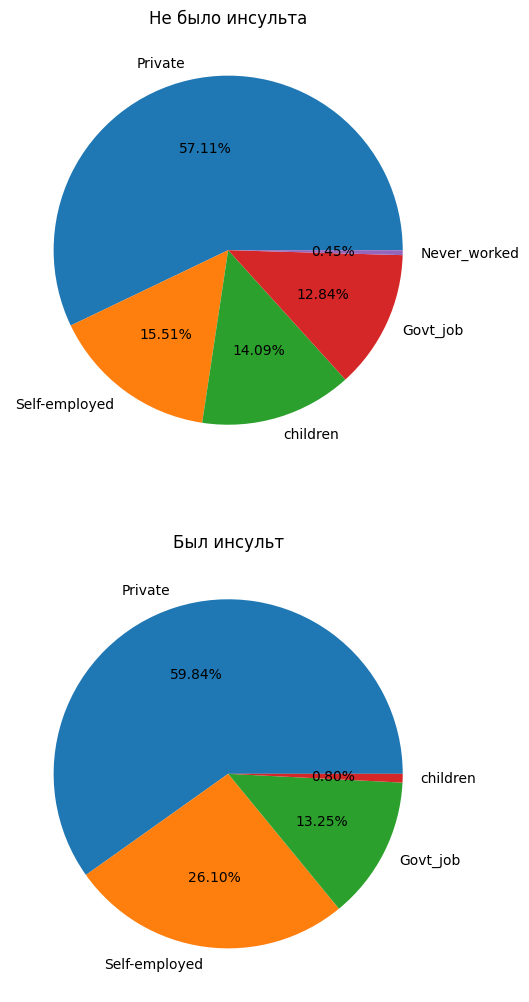

In [ ]:
plot_pie_compare('work_type') 

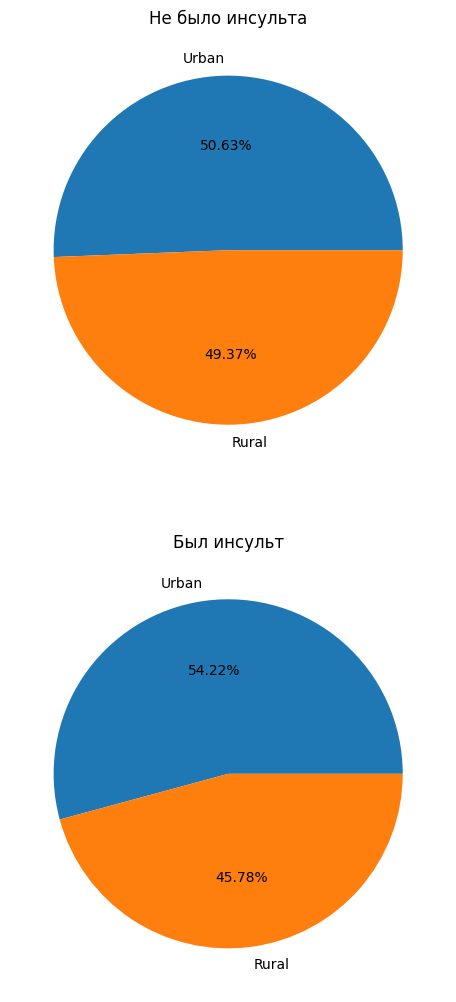

In [ ]:
plot_pie_compare('Residence_type')  

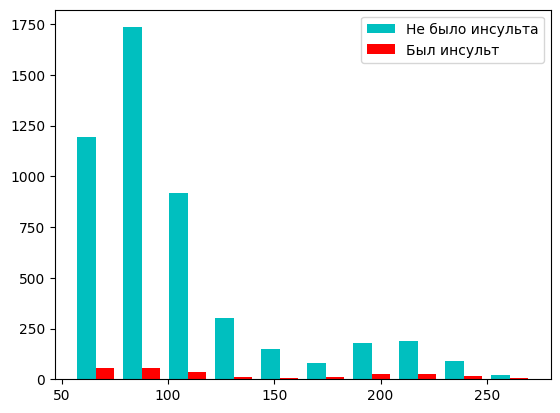

Нет инсульта: 91.47
Был инсульт: 105.22


In [ ]:
plot_hist_compare('avg_glucose_level') 
check_median('avg_glucose_level') 

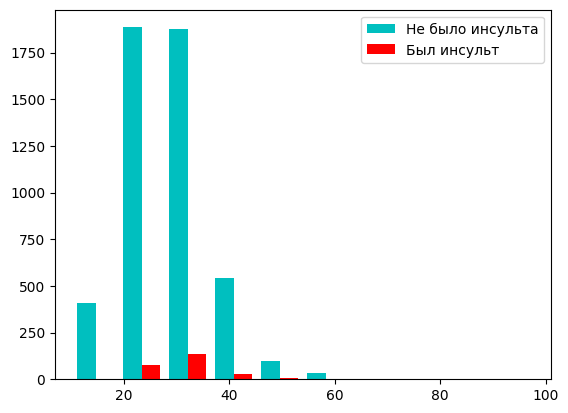

Нет инсульта: 28.3
Был инсульт: 30.471291866028707


In [ ]:
plot_hist_compare('bmi') 
check_median('bmi') 

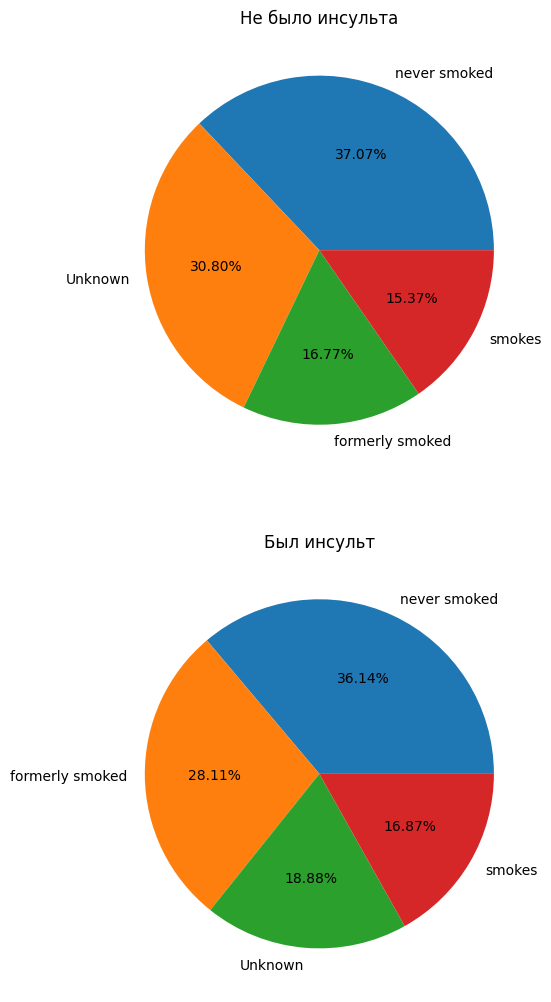

In [ ]:
plot_pie_compare('smoking_status') 

In [ ]:
df2 = df.copy()



df2.loc[df2["gender"] == "Male", "gender"] = 1
df2.loc[df2["gender"] == "Female", "gender"] = 0
df2.loc[df2["gender"] == "Other", "gender"] = 2

df2.loc[df2["ever_married"] == "Yes", "ever_married"] = 1
df2.loc[df2["ever_married"] == "No", "ever_married"] = 0

df2.loc[df2["work_type"] == "Private", "work_type"] = 0
df2.loc[df2["work_type"] == "Self-employed", "work_type"] = 1
df2.loc[df2["work_type"] == "children", "work_type"] = 2
df2.loc[df2["work_type"] == "Govt_jov", "work_type"] = 3
df2.loc[df2["work_type"] == "Never_worked", "work_type"] = 4
df2.loc[df2["work_type"] == "Govt_job", "work_type"] = 5

df2.loc[df2["Residence_type"] == "Urban", "Residence_type"] = 0
df2.loc[df2["Residence_type"] == "Rural", "Residence_type"] = 1

df2.loc[df2["smoking_status"] == "formerly smoked", "smoking_status"] = 1
df2.loc[df2["smoking_status"] == "never smoked", "smoking_status"] = 0
df2.loc[df2["smoking_status"] == "smokes", "smoking_status"] = 2
df2.loc[df2["smoking_status"] == "Unknown", "smoking_status"] = 3

df2.head(14)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0,0,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,1,1,202.21,30.471292,0,1
2,31112,1,80.0,0,1,1,0,1,105.92,32.500000,0,1
3,60182,0,49.0,0,0,1,0,0,171.23,34.400000,2,1
4,1665,0,79.0,1,0,1,1,1,174.12,24.000000,0,1
5,56669,1,81.0,0,0,1,0,0,186.21,29.000000,1,1
6,53882,1,74.0,1,1,1,0,1,70.09,27.400000,0,1
7,10434,0,69.0,0,0,0,0,0,94.39,22.800000,0,1
8,27419,0,59.0,0,0,1,0,1,76.15,30.471292,3,1
9,60491,0,78.0,0,0,1,0,0,58.57,24.200000,3,1


In [ ]:
# Изменяем типы данных в столбцах
df2[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']] = df2[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']].apply(pd.to_numeric)

                   gender    age  hypertension  heart_disease  ever_married  \
gender              1.000 -0.028         0.021          0.085        -0.031   
age                -0.028  1.000         0.276          0.264         0.679   
hypertension        0.021  0.276         1.000          0.108         0.164   
heart_disease       0.085  0.264         0.108          1.000         0.115   
ever_married       -0.031  0.679         0.164          0.115         1.000   
work_type           0.015 -0.069        -0.013         -0.019        -0.060   
Residence_type      0.007 -0.014         0.008         -0.003        -0.006   
avg_glucose_level   0.055  0.238         0.174          0.162         0.155   
bmi                -0.026  0.328         0.160          0.040         0.336   
smoking_status      0.084 -0.301        -0.119         -0.028        -0.252   
stroke              0.009  0.245         0.128          0.135         0.108   

                   work_type  Residence_type  avg_g

<Axes: >

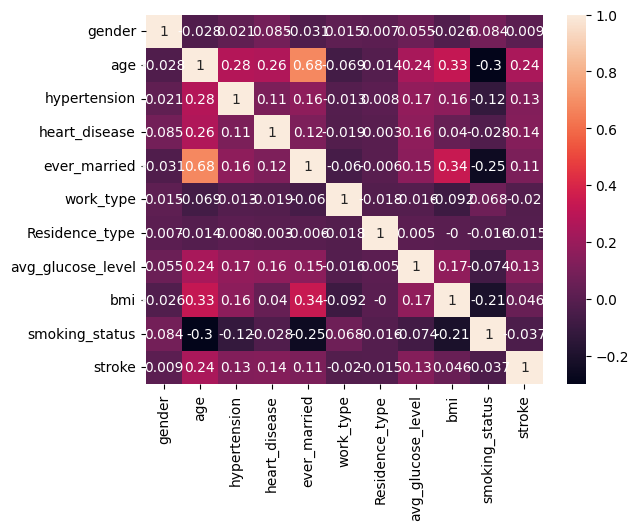

In [ ]:
numeric_col = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

corr_matrix = df2.loc[:,numeric_col].corr().round(3)

print(corr_matrix)

sns.heatmap(corr_matrix, annot=True)

#*Вывод*:


1.   По данным "gender" чаще инсульт не было/был у женщин 
2.   По данным "age" в среднем инсульт перенесли люди в возрасте 71 года, а не было инсульта в 43 года
3.   По данным "hypertension" риск развития инсульта у панциентов с гипертонией на 17.62% выше
4.   По данным "heart_disease" риск развития инсульта у пациентов с имеющимися проблема с сердцем на 14.17% выше
5.   По данным "ever_married" риск развития инсульта у панцентов находящихся в браке на 23.9% выше
6.   По данным "work_type" инсульт случается чаще у самозанятых пациентов на 10.59%
7.   По данным "Residence_type" практически незначительная разница пациентов проживающих в городе или в сельской местности, риск заболеть инсультом одинаковый
8.   По  данным "avg_glucose_level" в среднем инсульт случается у пациентов с уровнем глюкозы 105.22, чем ниже уровень глюкозы тем меньше шанс развития инсульта
9.   По данным "bmi" инсульт в среднем случался у пациентов с индексом массы тела 30.4
10.  По данным "smoking_status" у ранее курящих развитие инсульта на 12% выше
11.  Корряляционная матрица показывает зависимость между возрастом, статусом курением, нахождением в браке и ИМТ







In [ ]:
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, random_state=0)

In [ ]:
x = df2[['age','ever_married', 'bmi','hypertension', 'heart_disease','work_type', 'Residence_type', 'avg_glucose_level']]
Y = df2['stroke']
x_train, x_test, Y_train, Y_test = train_test_split(x,Y,train_size=0.7, random_state=0)

#*Моделирование*


In [ ]:
model = SVC()

In [ ]:
model2 = Sequential()

In [ ]:
model3=LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

SVC()

In [ ]:
model2.add(Dense(40, activation='softmax'))

In [ ]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model2.fit(X_train, y_train,epochs=100)

Epoch 1/100
112/112 [==============================] - 1s 2ms/step - loss: 3.4660 - accuracy: 0.8258
Epoch 2/100
112/112 [==============================] - 0s 3ms/step - loss: 3.0288 - accuracy: 0.9516
Epoch 3/100
112/112 [==============================] - 0s 3ms/step - loss: 2.5986 - accuracy: 0.9516
Epoch 4/100
112/112 [==============================] - 0s 3ms/step - loss: 2.1774 - accuracy: 0.9516
Epoch 5/100
112/112 [==============================] - 0s 3ms/step - loss: 1.7822 - accuracy: 0.9516
Epoch 6/100
112/112 [==============================] - 0s 3ms/step - loss: 1.4356 - accuracy: 0.9516
Epoch 7/100
112/112 [==============================] - 0s 3ms/step - loss: 1.1452 - accuracy: 0.9516
Epoch 8/100
112/112 [==============================] - 0s 3ms/step - loss: 0.9104 - accuracy: 0.9516
Epoch 9/100
112/112 [==============================] - 0s 3ms/step - loss: 0.7295 - accuracy: 0.9516
Epoch 10/100
112/112 [==============================] - 0s 3ms/step - loss: 0.5964 - accura

In [ ]:
model3.fit(x_train,Y_train)

LogisticRegression()

#*Оценка моделей*


In [ ]:
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



In [ ]:
y_pred2 = model2.evaluate(X_test, y_test)
print('Потери:',y_pred2[0])
print('Доля правильных ответов:',y_pred2[1])


48/48 [==============================] - 0s 2ms/step - loss: 0.1976 - accuracy: 0.9504
Потери: 0.19761472940444946
Доля правильных ответов: 0.9504240155220032


In [ ]:
y_pred3 = model3.predict(x_test)
print('Доля правильных ответов:', accuracy_score(Y_test,y_pred3))
print('Точность:', precision_score(Y_test,y_pred3))
print('Полнота:', recall_score(Y_test,y_pred3))

Доля правильных ответов: 0.9504240052185258
Точность: 0.5
Полнота: 0.013157894736842105


#*Развертывание модели*

Данная модель может быть развернута как декстопное приложение или веб-приложение в медицинских центрах. При приеме пациента в мед.учереждение, ему предоставляется анкета в приложении, и основываясь на полученной информации модель выдает данные, с помощью которых врач может более детально подходить к лечению пациента, если у него будет риск развития инсульта или предрасположенность к нему.

# *Выводы по работе*



1.   На риск возникновения инсульта могут влиять такие показатели как возраст, статус курения, нахождение в браке и ИМТ(индекс массы тела)
2.   Результаты использования моделей:

*   Метод опорных векторов предсказывает и прогнозирует ответы с точностью 95.04%
*   Модель Sequential предсказывает долю правильных ответов с аналогичной вероятностью
*   Линейная регрессия показала долю правильных ответов в 95.04%, точность в 50% и полноту ответа 0.13%


На основании этого, можно сделать вывод, что метод опорных векторов, модель Sequential и линейная регрессия показывают одинаковый процент доли правильных ответов на тестовых данных. 

